In [16]:
'Redes geneticas estocasticas' 'represilador'

#En este programa se implementa el agoritmo de Gillespie para reacciones bioquimicas,
#especificamente para una red de transcripcion/traduccion.

# se importan las librerias que seran usadas
import numpy as np
import math 
import random as rnd
import matplotlib.pyplot as plt
import statistics as st

#para implementar el algoritmo son necesarias algunas cantidades y definir algunos parametros
#condiciones iniciales de las variables involucradas y el tiempo

A=np.array([ [0,0,-1],
             [-1,0,0],
             [0,-1,0]]) # matriz de conexiones

t0=0.0 #tiempo inicial
tf=90 # tiempo final
t1=0.5 # tamaño de paso
N=[2,2,2]  #coeficientes de de Hill para cada uno de los nodos
K=[1,1,1]  #constantes de Michelson para cada nodo
h= 1 #numero de veces para realizar la misma simulacion
n= len(A[0]) #numero de nodos
n2= 2 #numero de elementos en cada nodo
Omega=200 # tamano del sistema

#condiciones iniciales para cada nodo
x=[[Omega,0], #vector de condiciones iniciales [ARm0, P0]
    [0,0],                              #  [ARm1, P1]
    [0,0]]                              #  [ARm2, P2]

#parametros, los vectores para cada uno de los nodos 
p1=1
p2=10
k1=[p2,p1,1,p1]  #[sintesis o degradacion de ARm a travez de Hill, degradacion ARm, sintesis proteina, degradacion proteina]
k2=[p2,p1,1,p1]  
k3=[p2,p1,1,p1]  

k=[k1,k2,k3] # vector de parametros para todo el sistema

#contruimos la matriz estequiometrica para cada nodo 'evitar editar a partir de esta linea'
S= [[1,-1,0, 0],
    [ 0,0 ,1,-1],]

#construimos la matriz estequimetrica del sistema
def ST(S,n):
    l1=np.zeros([2,4])
    S1=S
    l2=l1
    l3=S
    for i in range(n-1):
        S1= np.append(S1, l2, axis = 1)
        l3=np.append(l1,l3, axis=1)
        S1= np.r_[S1,l3]
        l2= np.r_[l2,l1]
    return S1

S=ST(S,n)

#construimos lista nodos conectados entre si

def vec(A):
    l2=[]
    for i in range(n):
        for j in range(n):
            if A[i][j]!=0:
                l2.append(j)
    return l2

vecco= vec(A)

# miscelanea de funciones usadas

def H_d(x,n,j): #funcion de hill determinista
    return 1/(1 + (x/j)**n)

def H_ap(x,n,j): # funcion de hill con aproximaciones
    return (1 )/(1 + (x/j)**n + (n/(2*j))*(n-1)*(x/j)**(n-1))

# construimos el vector de propension para cada nodo

def ninodo(y1,x1,k1,j,N): #funcion de propension para cada nodo
    l1= [k1[0]*(H_ap(y1,N,j)), k1[1]*x1[0]/j, k1[2]*x1[0]/j, k1[3]*x1[1]/j]
    return l1

def ni(x,k,j): #funcion de porpension para todo el sistema
    l1=[]
    for i in range(n):
        l2=ninodo(x[vecco[i]][1],x[i],k[i],j,N[i])
        l1=l1+l2
    return l1

def dist_exp(a):# funcion para calcular tau 
    r = rnd.random()
    return -(1./(a))*math.log(r)
    
def numero(S1,a): # funcion que devuelve mu
    l1=0
    l2= S1[0]/a
    l3=0
    r=np.random.rand()
    while l1<len(S1) and l3==0:
        if r<=l2 and S1[l1]!=0:
            l3=l3+1
            return l1
        else:
            l1=l1+1
            l2= l2 + S1[l1]/a
 
# la funcion que esta a continuacion nos permite realizar  el proceso estocastico hasta que haya 
#pasado T tiempo para un determinado tamano del sistema.

def ev(x,k,j): #x=condicion inicial, j=tamano del sistema
    t = np.arange(0,tf+t1,t1)
    l3=0
    Z=np.zeros([n,n2,len(t)])
    Y = x
    Z[:,:,0] = x
    l6=1
    while l6<len(t) or l3<tf:
        if l3<(l6)*t1:
            ni1 = ni(Y,k,j) #vector de propension
            a=sum(ni1)
            tau = dist_exp(a)/j
            #mu=rnd.choices(ni1,weights=ni1)
            mu = numero(ni1,a)
            l5=0
            for j1 in range(n):
                for j2 in range(n2):
                   Y[j1][j2] = Y[j1][j2] + S[l5][mu]
                   l5=l5+1
            l3=l3+tau
        else:
            Z[:,:,l6]=Y
            l6=l6+1
    return t ,  Z

#con la funcion que ya hemos programado, podemos repetirla algun numero determinado de veces,
# para ello claculamos la funcion anterior algun numero de veces y la graficamos 

def varios1(x,k,j,q): #p= pasos  j= tamano del sistema, 
   # q= numero de veces que se realiza la misma simulacion 
    l1=0
    while l1<q:
        T0, l3 =ev(x,k,j)
        for i in range(n):
            for j1 in range(n2):
                if j1==0:
                    plt.figure(1)
                    plt.plot(T0,l3[i][j1]/j, label= i)
                    plt.xlabel("t (tiempo)")
                    plt.ylabel("x (concentracion de ARm)")
                    plt.title("concentracion de las especies de ARm" )
                    plt.xlim(0, tf)
                    plt.ylim(-0.0005)
                    plt.legend()
                if j1==1:
                    plt.figure(2)
                    plt.plot(T0,l3[i][j1]/j, label= i)
                    plt.xlabel("t (tiempo)")
                    plt.ylabel("x (concentracion de proteinas)")
                    plt.title("concentracion de proteinas" )
                    plt.xlim(0, tf)
                    plt.ylim(-0.0001)
                    plt.legend()
        l1=l1+1
    plt.show()

#realizar las graficas de las variables
#varios1(x,k,Omega,h)


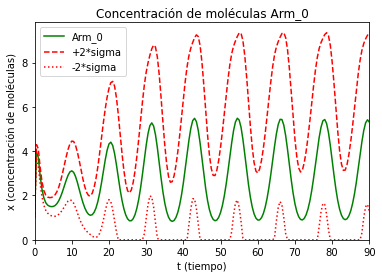

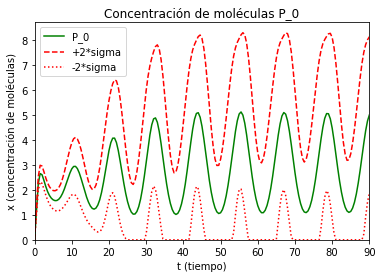

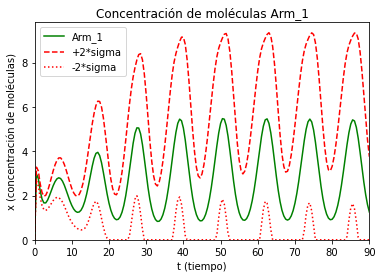

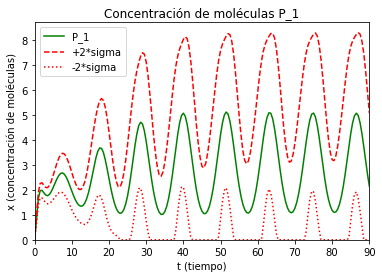

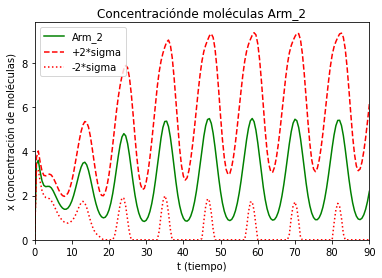

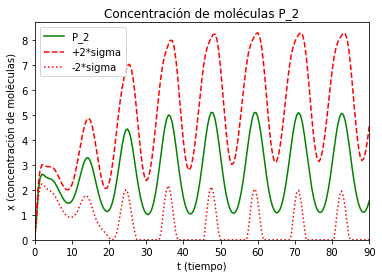

In [20]:
def varios(x,k,j,q): #p= pasos  j= tamano del sistema, 
   # q= numero de veces que se realiza la misma simulacion 
    l1=0
    while l1<q:
        if l1==0:
            x=[[Omega,0], #vector de condiciones iniciales [ARm0, P0]
               [0,0],                              #  [ARm1, P1]
                [0,0]]
            T0, l2 =ev(x,k,j)
            ky=len(T0)
            l4= np.zeros([n,n2,ky,q])
            l3=np.zeros([n,n2,ky])
            l5=np.zeros([n,n2,ky])
            l6=np.zeros([n,n2,ky])
            l4[:,:,:,l1]=l2
            l1=l1+1
        else:
            x=[[Omega,0], #vector de condiciones iniciales [ARm0, P0]
               [0,0],                              #  [ARm1, P1]
                [0,0]]
            T0, l2 =ev(x,k,j)
            l4[:,:,:,l1]=l2
            l1=l1+1
    for i in range(n):
        for j1 in range(n2):
            for j2 in range(ky):
                l3[i,j1,j2]=st.mean(l4[i,j1,j2,:])
                l5[i,j1,j2]=math.sqrt(st.pvariance(l4[i,j1,j2,:],l3[i,j1,j2]))
                l6[i][j1][j2]= heav(l3[i][j1][j2] - 2*l5[i][j1][j2])
    l7=0
    for i in range(n):
        for j1 in range(n2):
            plt.figure(nom1[l7])
            plt.title(nom2[l7] )
            plt.plot(T0,l3[i][j1]/j,color="green", label= nom3[l7])
            plt.plot(T0,(l3[i][j1]+2*l5[i][j1])/j,'--', color="red", label= '+2*sigma')
            plt.plot(T0,l6[i][j1]/j,':', color="red", label= '-2*sigma')
            plt.xlabel("t (tiempo)")
            plt.ylabel("x (concentración de moléculas)")
            plt.xlim(0, tf)
            plt.ylim(0)
            plt.legend()
            l7= l7 + 1 
    plt.show()

#funciones para poder graficar
def heav(vec): #funcion que devuelve solo valores mayores que cero
    if vec>=0:
        vec=vec                 
    else:
        vec=0  
    return vec

nom1=[1,2,3,4,5,6]

nom2=['Concentración de moléculas Arm_0', 'Concentración de moléculas P_0',
      'Concentración de moléculas Arm_1', 'Concentración de moléculas P_1',
      'Concentraciónde moléculas Arm_2', 'Concentración de moléculas P_2' ]

nom3=['Arm_0', 'P_0', 'Arm_1', 'P_1', 'Arm_2', 'P_2' ]

#realizar las graficas de las variables
h=10000
varios(x,k,Omega,h)